In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df=pd.read_csv("insurance.csv")
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe().T

count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801

In [10]:
df.duplicated().any()

True

<AxesSubplot:xlabel='age', ylabel='Density'>

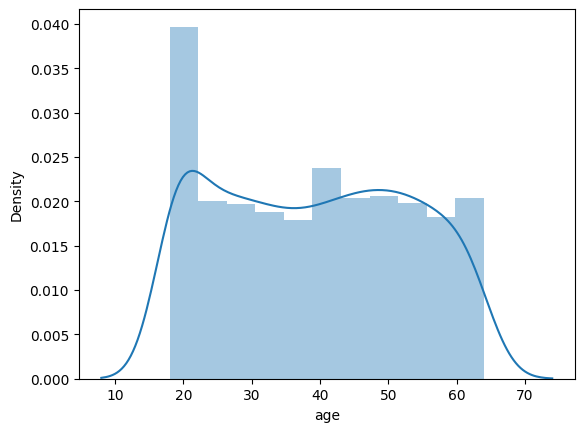

In [11]:
sns.distplot(df.age)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

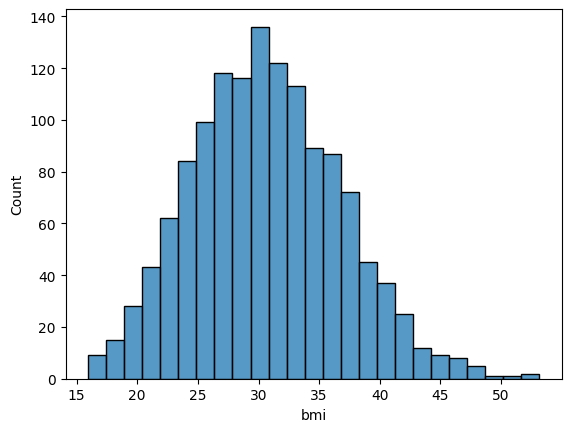

In [12]:
sns.histplot(df.bmi)

<AxesSubplot:xlabel='sex', ylabel='count'>

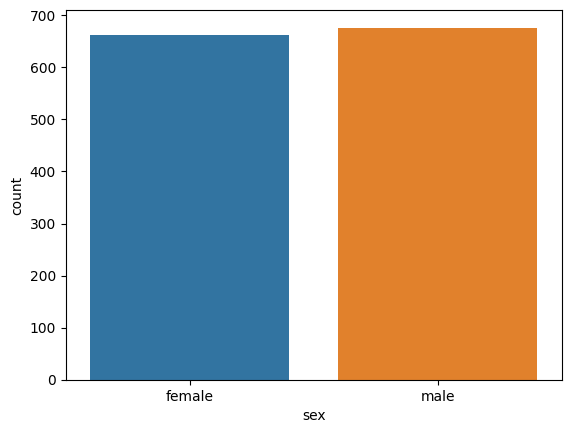

In [13]:
sns.countplot(df.sex)

<AxesSubplot:xlabel='charges', ylabel='Density'>

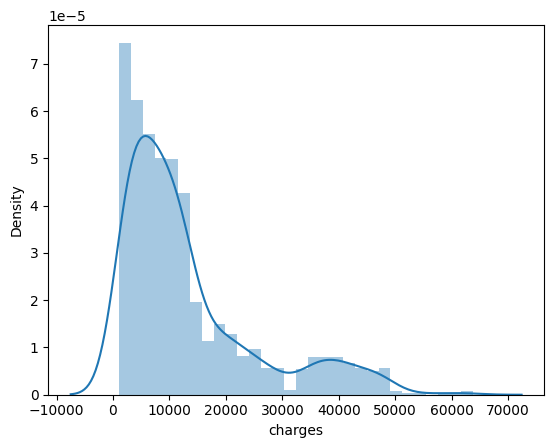

In [15]:
#This is target variable distribution
sns.distplot(df.charges)

In [16]:
#target variable i sright skewed

In [17]:
#applying log transformation

In [19]:
df["charges"]=np.log(df["charges"])

<AxesSubplot:xlabel='charges', ylabel='Density'>

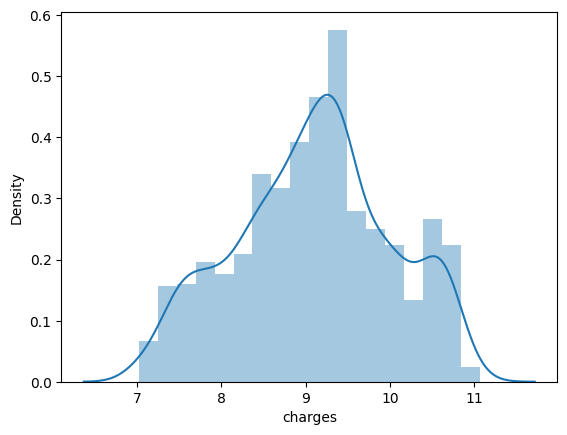

In [20]:
sns.distplot(df.charges)

<AxesSubplot:xlabel='children', ylabel='count'>

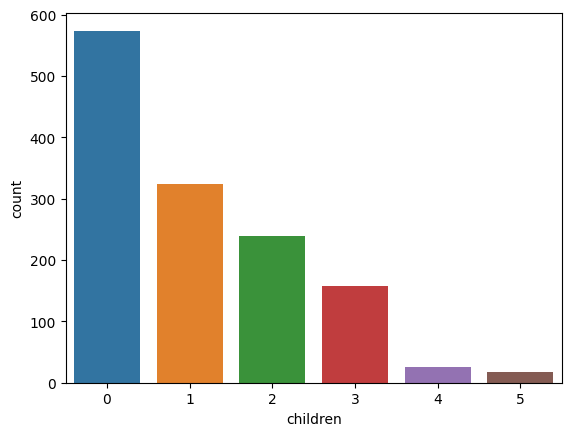

In [22]:
sns.countplot(df.children)

<AxesSubplot:xlabel='smoker', ylabel='count'>

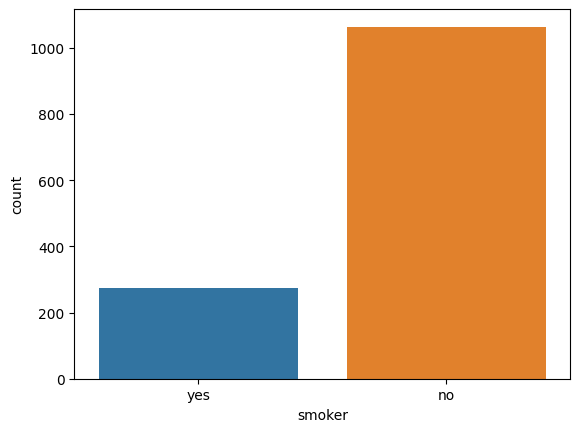

In [25]:
sns.countplot(df.smoker)

<AxesSubplot:xlabel='region', ylabel='count'>

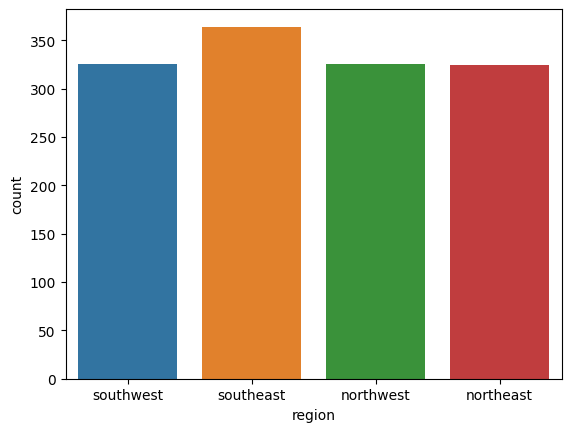

In [26]:
sns.countplot(df.region)

<AxesSubplot:xlabel='age', ylabel='sex'>

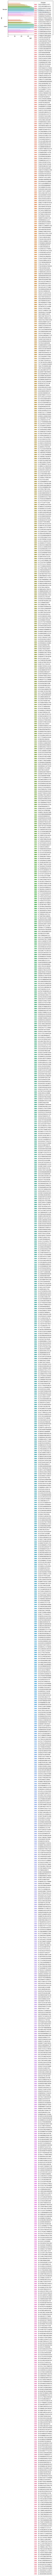

In [29]:
sns.barplot(df["age"],df["sex"],hue=df["charges"])

In [31]:
df.groupby("sex").mean()

age        bmi  children   charges
sex                                             
female  39.503021  30.377749  1.074018  9.093428
male    38.917160  30.943129  1.115385  9.103782

In [32]:
df.groupby("smoker").mean()

age        bmi  children    charges
smoker                                           
no      39.385338  30.651795  1.090226   8.788232
yes     38.514599  30.708449  1.113139  10.304110

In [33]:
df.groupby("region").mean()

age        bmi  children   charges
region                                             
northeast  39.268519  29.173503  1.046296  9.168768
northwest  39.196923  29.199785  1.147692  9.069733
southeast  38.939560  33.355989  1.049451  9.122402
southwest  39.455385  30.596615  1.141538  9.031098

In [34]:
# Encoding of catogrical col

In [36]:
cat_col=df.select_dtypes(include=["O"]).columns


In [37]:
cat_col

Index(['sex', 'smoker', 'region'], dtype='object')

In [38]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [39]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [40]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [41]:
# get dummies

In [42]:
df=pd.get_dummies(df,drop_first=True)

In [43]:
df.head()

age     bmi  children   charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  9.734176         0           1                 0   
1   18  33.770         1  7.453302         1           0                 0   
2   28  33.000         3  8.400538         1           0                 0   
3   33  22.705         0  9.998092         1           0                 1   
4   32  28.880         0  8.260197         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

In [44]:
corr=df.corr()

<AxesSubplot:>

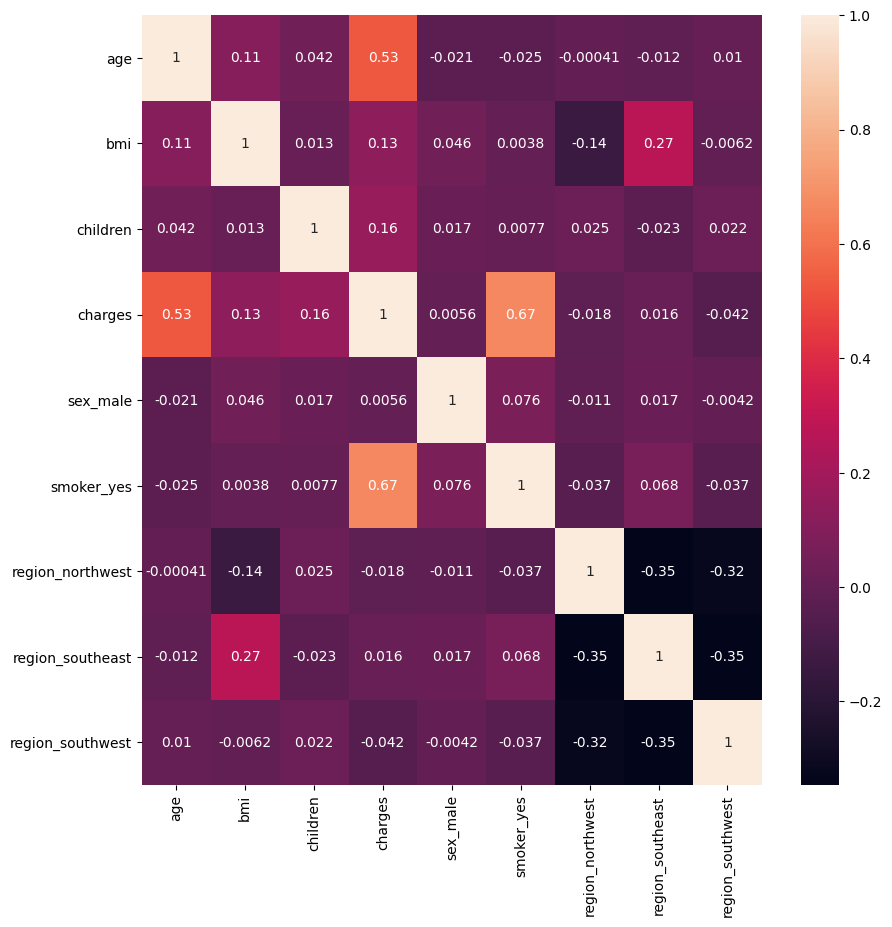

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [48]:
X=df.drop(["charges"],axis=True)
y=df["charges"]

In [49]:
#splitting data into train test split 

In [50]:
from sklearn.model_selection import train_test_split 

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [53]:
X_train.shape

(1070, 8)

In [54]:
X_test.shape

(268, 8)

In [55]:
y_train.shape

(1070,)

In [56]:
y_test.shape

(268,)

In [57]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()

In [62]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Model_Building 

In [73]:
from sklearn.metrics import r2_score,mean_squared_error
def any_model(model):
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    print("train data")
    print("Train_r2_score:",round(r2_score(y_train,y_train_pred),2))
    print("Train_r2_score:",round(np.sqrt(mean_squared_error(y_train,y_train_pred)),2))
    print("test data")
    print("test_r2_score:",round(r2_score(y_test,y_test_pred),2))
    print("test_r2_score:",round(np.sqrt(mean_squared_error(y_test,y_test_pred)),2))
    
    return model

In [74]:
#model 1:Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression 

In [76]:
lr=LinearRegression()

In [78]:
any_model(lr)

train data
Train_r2_score: 0.76
Train_r2_score: 0.46
test data
test_r2_score: 0.81
test_r2_score: 0.39


LinearRegression()

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
dt=DecisionTreeRegressor()


In [82]:
any_model(dt)

train data
Train_r2_score: 0.99
Train_r2_score: 0.07
test data
test_r2_score: 0.76
test_r2_score: 0.43


DecisionTreeRegressor()

In [86]:
from sklearn.neighbors import KNeighborsRegressor

In [87]:
knn=KNeighborsRegressor()

In [88]:
any_model(knn)

train data
Train_r2_score: 0.85
Train_r2_score: 0.36
test data
test_r2_score: 0.83
test_r2_score: 0.37


KNeighborsRegressor()